In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl")
print(df.shape)
df.head()

(1728485, 10)


,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1


In [3]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")

In [4]:
df.set_index(['customer_id', 'account_id'], inplace=True)

In [5]:
df['ideal_journey'] = df['ideal_journey'].map({0: 'unsuccessful', 1: 'successful'})


In [6]:
df['promotion_exposure'] = df['promotion_exposure'].map({0: 'no', 1: 'yes'})


In [7]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
stage_dict = {v:k for k,v in stage_dict.items()}

df['first_stage'] = df['first_stage'].map(stage_dict)

In [8]:
df.head()

,,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
customer_id,account_id,,,,,,,,
-2147483541,2059949086,12,715,Apply for Credit,10,5,8,unsuccessful,yes
-2147481037,-1245770865,12,25,Apply for Credit,8,26,12,unsuccessful,yes
-2147474335,-1929965268,2,159,Discover,4,14,1,successful,yes
-2147474305,1098145658,6,660,First Purchase,11,28,22,unsuccessful,yes
-2147472167,889210381,12,213,Apply for Credit,2,19,8,successful,yes


In [9]:
df['ideal_journey'].value_counts(normalize = True)

ideal_journey
unsuccessful    0.816759
successful      0.183241
Name: proportion, dtype: float64

In [10]:
df['promotion_exposure'].value_counts(normalize = True)

promotion_exposure
yes    0.910302
no     0.089698
Name: proportion, dtype: float64

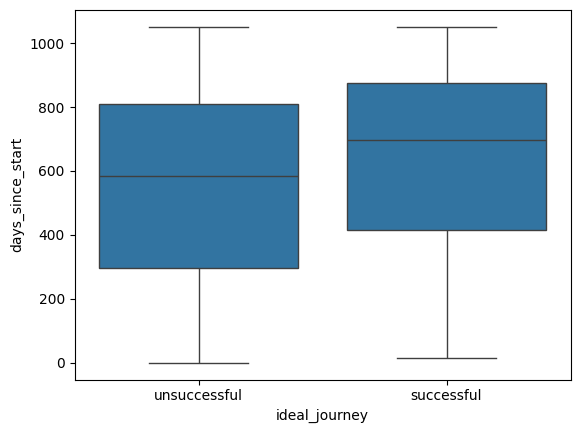

In [11]:
sns.boxplot(data=df, x='ideal_journey', y='days_since_start')
plt.show()

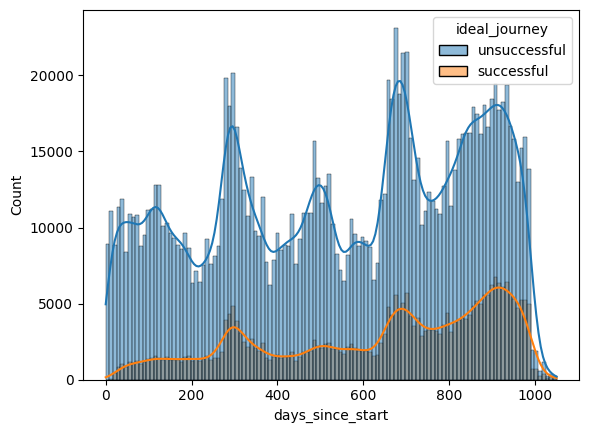

In [12]:
sns.histplot(data=df, x='days_since_start', hue='ideal_journey', kde=True)
plt.show()

<Axes: xlabel='ideal_journey', ylabel='days_since_start'>

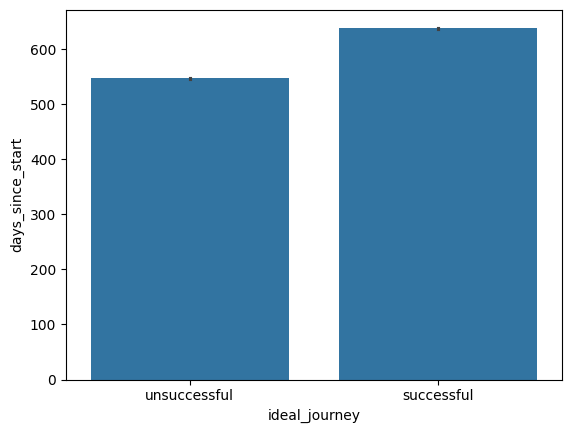

In [13]:
sns.barplot(x = 'ideal_journey', y = 'days_since_start', data = df)

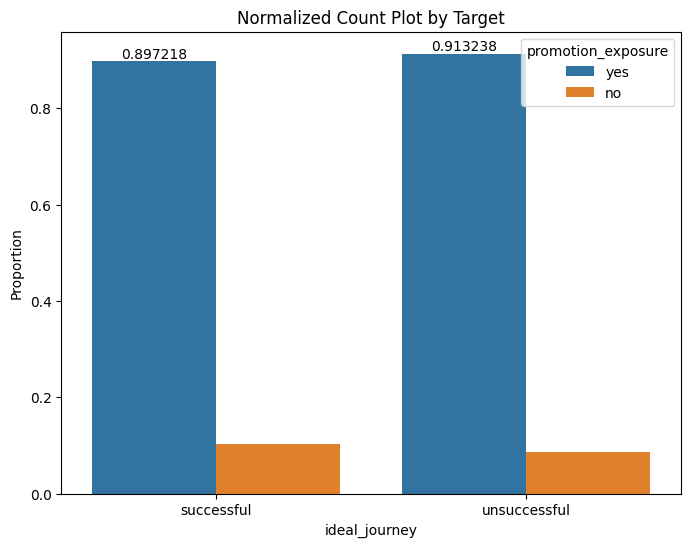

In [14]:
# Calculate proportions within each class
proportions = df.groupby('ideal_journey')['promotion_exposure'].value_counts(normalize=True).rename('proportion').reset_index()


# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='ideal_journey', y='proportion', hue='promotion_exposure', data=proportions, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Normalized Count Plot by Target')
plt.ylabel('Proportion')
plt.show()


In [15]:
df

,,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
customer_id,account_id,,,,,,,,
-2147483541,2059949086,12,715,Apply for Credit,10,5,8,unsuccessful,yes
-2147481037,-1245770865,12,25,Apply for Credit,8,26,12,unsuccessful,yes
-2147474335,-1929965268,2,159,Discover,4,14,1,successful,yes
-2147474305,1098145658,6,660,First Purchase,11,28,22,unsuccessful,yes
-2147472167,889210381,12,213,Apply for Credit,2,19,8,successful,yes
...,...,...,...,...,...,...,...,...,...
2147480051,-148210516,21,1006,Prospecting,12,18,0,unsuccessful,yes
2147480182,-1286764612,12,90,Apply for Credit,6,22,9,unsuccessful,yes
2147480920,496493954,2,487,Discover,5,21,6,unsuccessful,yes


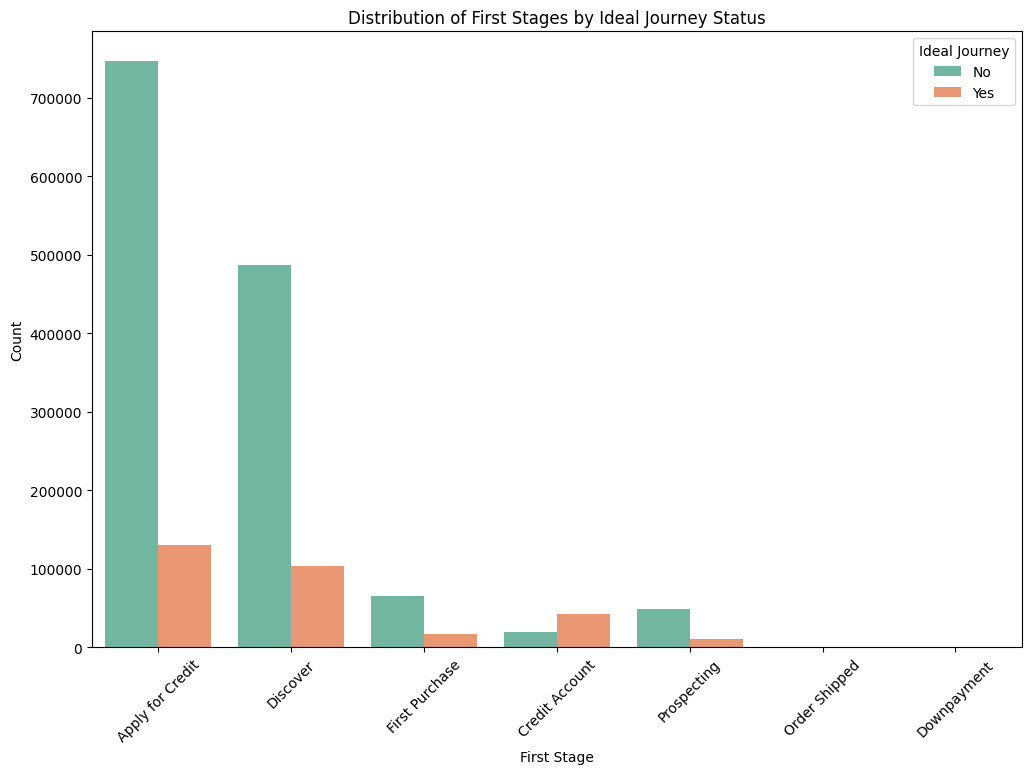

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(x='first_stage', hue='ideal_journey', data=df, palette='Set2')
plt.title('Distribution of First Stages by Ideal Journey Status')
plt.xlabel('First Stage')
plt.ylabel('Count')
plt.legend(title='Ideal Journey', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Helps with label readability
plt.show()

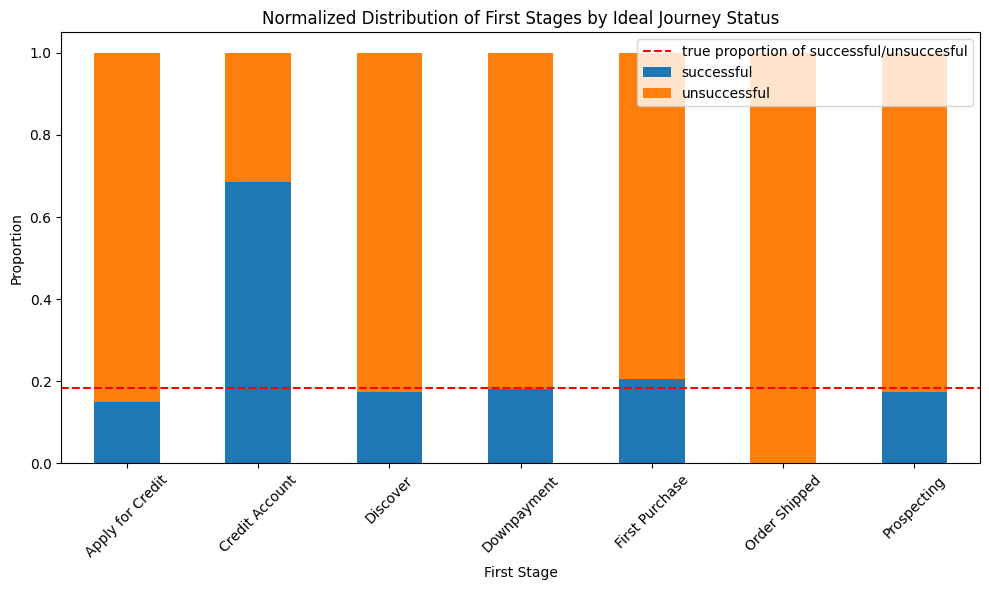

In [69]:
proportions = df.groupby(['first_stage', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)

# Plot
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of First Stages by Ideal Journey Status')
plt.xlabel('First Stage')
plt.ylabel('Proportion')
plt.axhline(y=0.183241, color='red', linestyle='--', label = 'true prop of successful/unsuccesful')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Improve label readability
plt.tight_layout()
plt.show()

In [70]:
df_ideal = df[df['ideal_journey'] == 'successful']
df_nonideal = df[df['ideal_journey'] == 'unsuccessful']

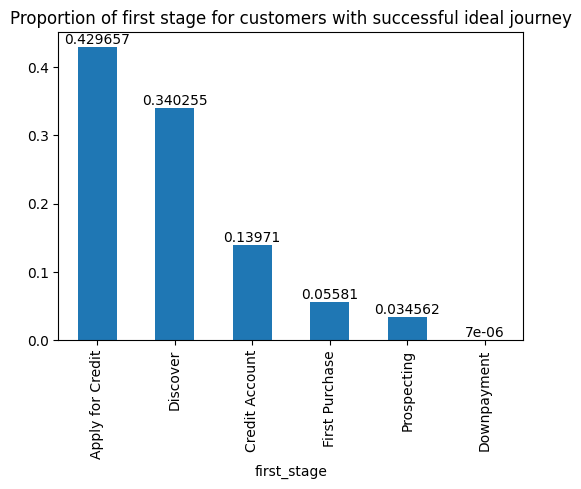

In [81]:
plt.figure(figsize = (6, 4))
df_ideal['first_stage'].value_counts(normalize=True).plot(kind='bar')

# Add labels to the bars
for i, v in enumerate(df_ideal['first_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of first stage for customers with successful ideal journey")
plt.show()


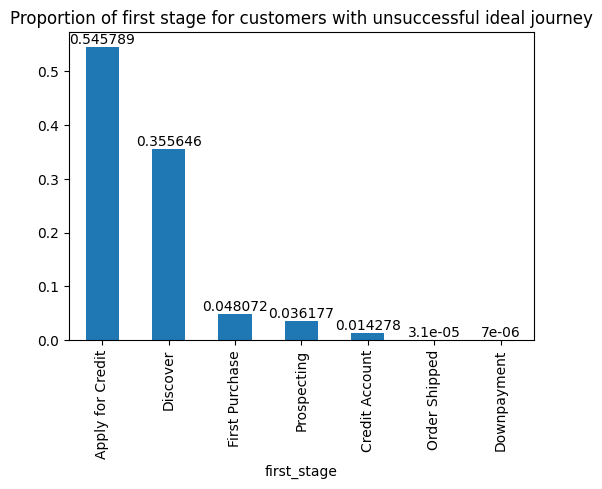

In [82]:
plt.figure(figsize = (6, 4))
df_nonideal['first_stage'].value_counts(normalize=True).plot(kind='bar')

# Add labels to the bars
for i, v in enumerate(df_nonideal['first_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of first stage for customers with unsuccessful ideal journey")
plt.show()


## Now inspect wide format data

In [18]:
wide_df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [19]:
wide_df.set_index(['customer_id', 'account_id'], inplace=True)

In [20]:
wide_df

,,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
customer_id,account_id,,,,,,,
-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
...,...,...,...,...,...,...,...,...
2147480051,-148210516,"[21, 22, 2, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]","[catalog_(mail), pre-application_(3rd_party_af...","[2020-12-18 00:00:00+00:00, 2021-01-23 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Prospecting, Discover, Discover, Apply for Cr...",0,0
2147480182,-1286764612,"[12, 2, 24, 4, 24, 24, 24, 24, 24]","[application_web_approved, campaign_click, cam...","[2023-06-22 09:44:49+00:00, 2023-06-22 15:44:4...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Apply for Credit, Discover, Campaignemail Cli...",0,0
2147480920,496493954,"[2, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, ...","[campaign_click, application_web_view, applica...","[2022-05-21 06:00:00+00:00, 2022-05-21 23:30:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",0,0


In [21]:
# wide_df['ideal_journey'] = df['ideal_journey']
wide_df['ideal_journey'] = wide_df.index.map(df['ideal_journey'])

In [22]:
wide_df['event_count'] = wide_df['event_name'].apply(len)
wide_df['unique_event_count'] = wide_df['event_name'].apply(lambda x: len(set(x)))
wide_df['unique_stage_count'] = wide_df['stage'].apply(lambda x: len(set(x)))
wide_df['last_event'] = wide_df['event_name'].apply(lambda x: x[-1] if x else None)
wide_df['last_stage'] = wide_df['stage'].apply(lambda x: x[-1] if x else None)
wide_df['len_journey'] = wide_df['journey_steps_until_end'].apply(len)
wide_df['days_in_journey'] = wide_df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
wide_df['progression_rate'] = wide_df['len_journey'] / wide_df['days_in_journey'] # estimate for progression rate of journey

In [23]:
wide_df.head()

,,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order,ideal_journey,event_count,unique_event_count,unique_stage_count,last_event,last_stage,len_journey,days_in_journey,progression_rate
customer_id,account_id,,,,,,,,,,,,,,,,
-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0,unsuccessful,29,7,4,promotion_created,Promotion Created,29,238,0.121849
-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0,unsuccessful,7,7,4,begin_checkout,First Purchase,7,0,inf
-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1,successful,25,14,7,order_shipped,Order Shipped,25,17,1.470588
-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0,unsuccessful,32,8,4,catalog_(mail),Prospecting,32,196,0.163265
-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1,successful,39,13,6,order_shipped,Order Shipped,39,19,2.052632


In [93]:
wide_df['first_purchase'] = wide_df['stage'].apply(lambda x: 1 if 'First Purchase' in x else 0)

In [24]:
event_id_dict = dict(zip(def_df['event_definition_id'], def_df['event_name']))


In [25]:
event_dict = def_df.set_index('event_definition_id')['stage'].to_dict()

# add additional key value pair
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

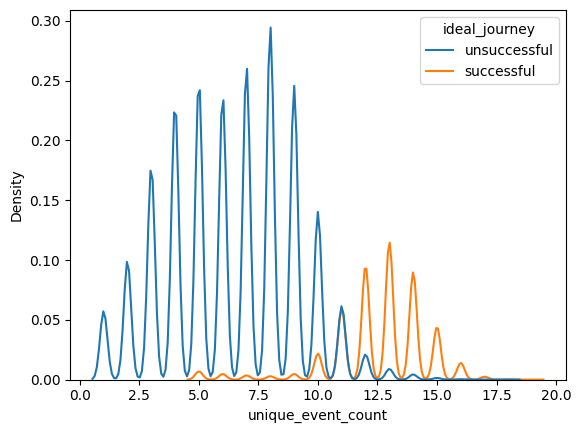

In [26]:
sns.kdeplot(data=wide_df, x='unique_event_count', hue='ideal_journey')
plt.show()

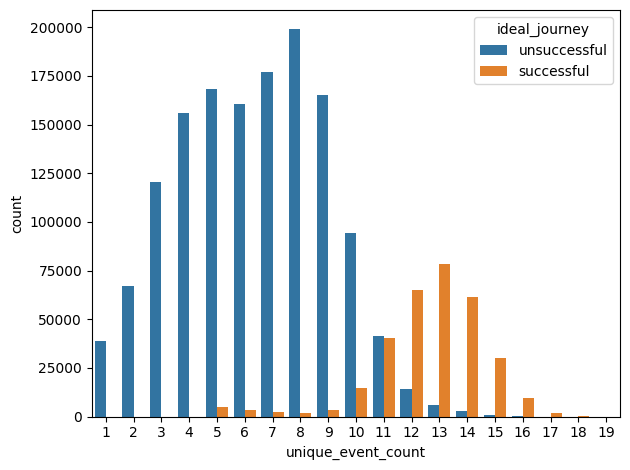

In [27]:
sns.countplot(data=wide_df, x='unique_event_count', hue='ideal_journey')

# Improve the readability of the plot
# plt.xticks(rotation=90)  # Rotate the x labels if there are many unique counts
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

plt.show()

In [94]:
ideal_df = wide_df[wide_df['ideal_journey'] == 'successful']
nonideal_df = wide_df[wide_df['ideal_journey'] == 'unsuccessful']

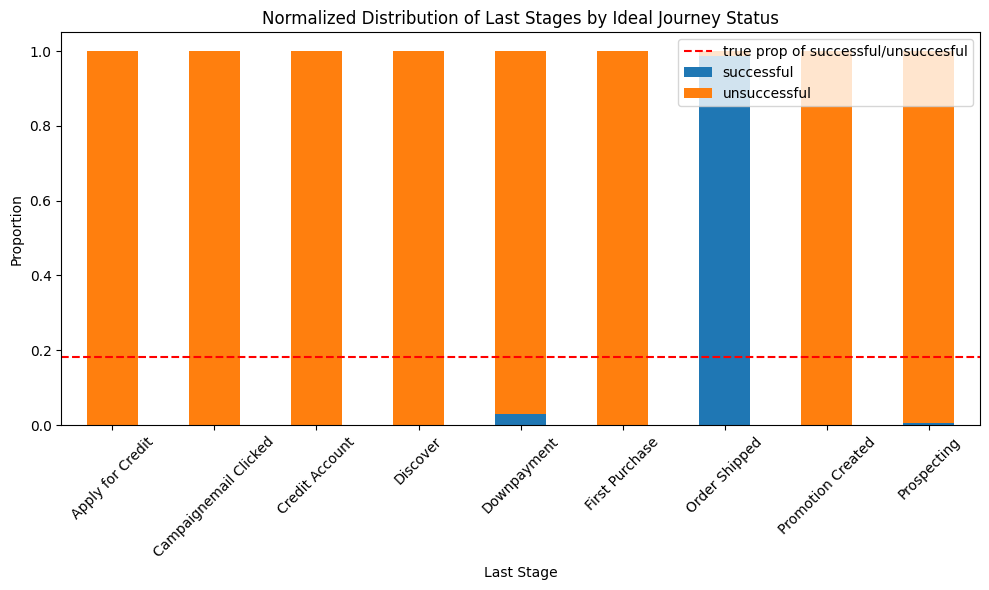

In [84]:
proportions = wide_df.groupby(['last_stage', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)

# Plot
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of Last Stages by Ideal Journey Status')
plt.xlabel('Last Stage')
plt.ylabel('Proportion')
plt.axhline(y=0.183241, color='red', linestyle='--', label = 'true prop of successful/unsuccesful')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Improve label readability
plt.tight_layout()
plt.show()

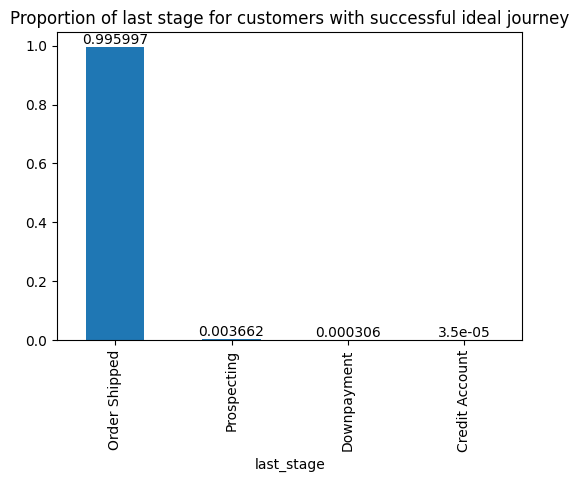

In [88]:
plt.figure(figsize = (6, 4))
ideal_df['last_stage'].value_counts(normalize=True).plot(kind='bar')

# Add labels to the bars
for i, v in enumerate(ideal_df['last_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of last stage for customers with successful ideal journey")
plt.show()


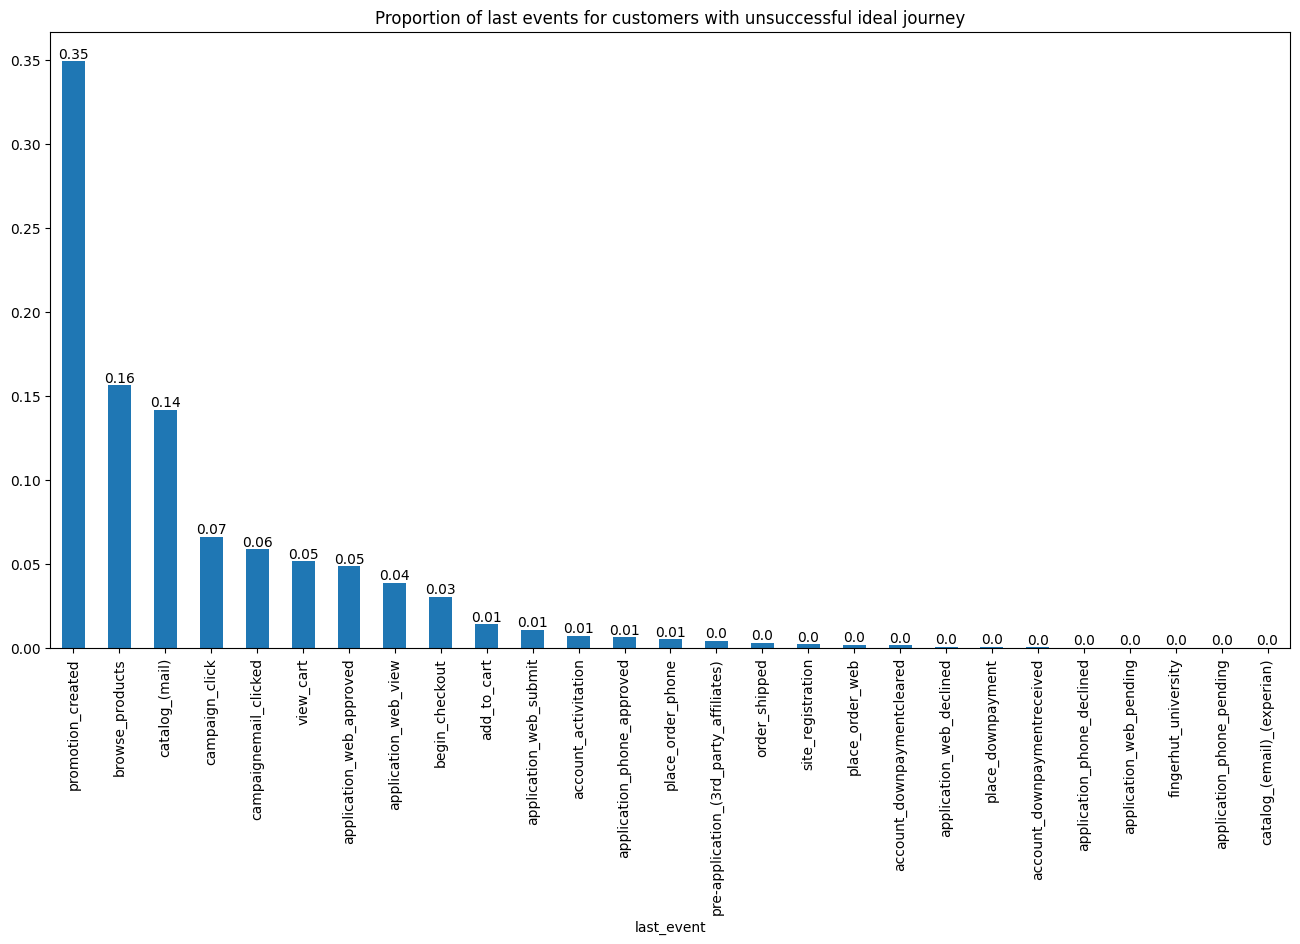

In [55]:
plt.figure(figsize = (16, 8))
nonideal_df['last_event'].value_counts(normalize=True).plot(kind='bar')

# Add labels to the bars
for i, v in enumerate(nonideal_df['last_event'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    
plt.title("Proportion of last events for customers with unsuccessful ideal journey")
plt.show()


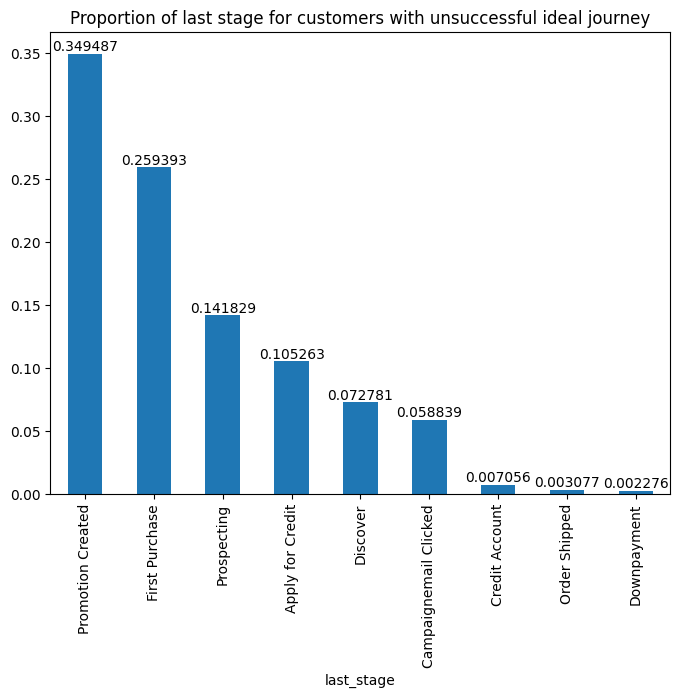

In [90]:
plt.figure(figsize = (8, 6))
nonideal_df['last_stage'].value_counts(normalize=True).plot(kind='bar')

# Add labels to the bars
for i, v in enumerate(nonideal_df['last_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
    
plt.title("Proportion of last stage for customers with unsuccessful ideal journey")
plt.show()


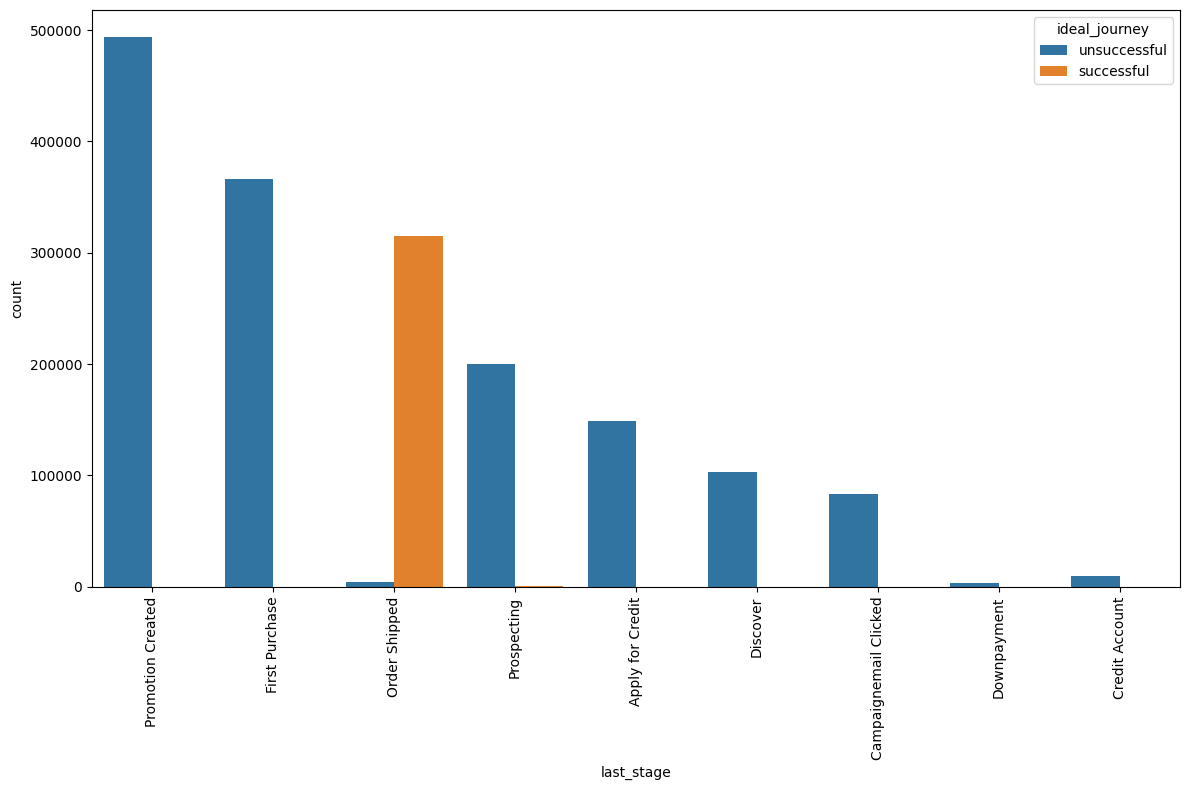

In [83]:
plt.figure(figsize = (12, 8))
sns.countplot(data=wide_df, x='last_stage', hue='ideal_journey')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

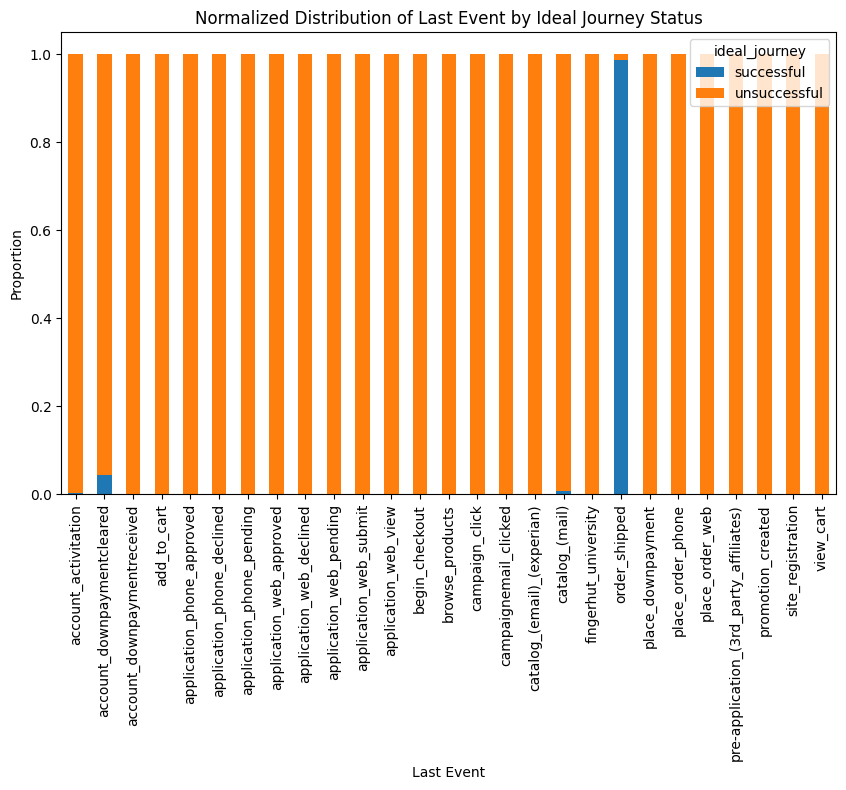

In [35]:
proportions = wide_df.groupby(['last_event', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)

# Plot
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of Last Event by Ideal Journey Status')
plt.xlabel('Last Event')
plt.ylabel('Proportion')
# plt.legend(title='Ideal Journey', labels=['No', 'Yes'])
plt.xticks(rotation=90)  # Improve label readability
plt.show()

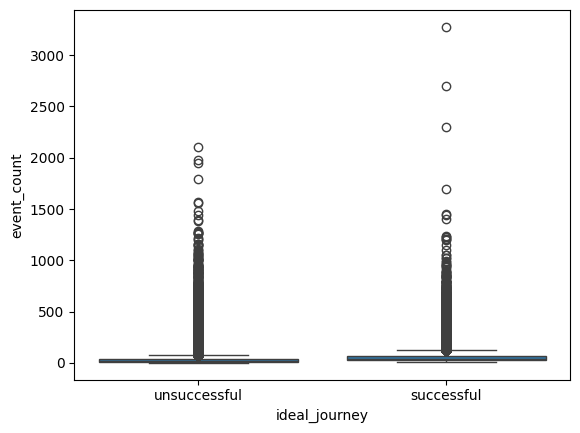

In [27]:
sns.boxplot(data=wide_df, x='ideal_journey', y='event_count')
plt.show()

In [ ]:
from itertools import chain

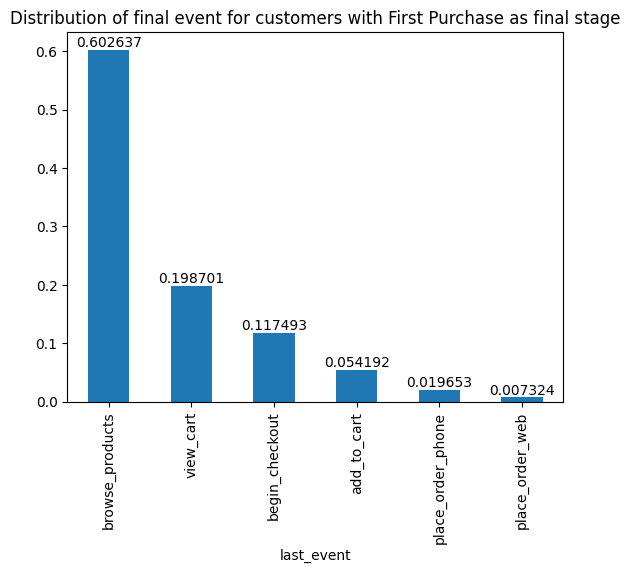

In [104]:
last_stage_purchase = wide_df[wide_df['last_stage'] == 'First Purchase']
last_stage_purchase['last_event'].value_counts(normalize = True).plot(kind = 'bar')

for i, v in enumerate(last_stage_purchase['last_event'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
    
plt.title("Distribution of final event for customers with First Purchase as final stage")
plt.show()

In [ ]:
first_purchase_df = wide_df[widf['stage'].apply(lambda stages: 'First Purchase' in stages)]

# Flatten the list of event names in the filtered rows
event_names = list(chain.from_iterable(wide_df['event_name']))

# Count the occurrences of each event name
event_name_counts = pd.Series(event_names).value_counts()

# Plot the counts of event names
plt.figure(figsize=(10, 8))
sns.barplot(x=event_name_counts.values, y=event_name_counts.index)
plt.xlabel('Counts')
plt.ylabel('Event Names')
plt.title('Counts of Event Names Corresponding to "First Purchase" Stage')
plt.show()

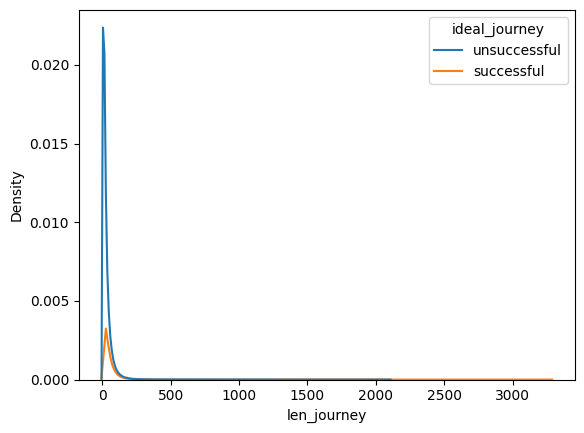

In [109]:
sns.kdeplot(data=wide_df, x='len_journey', hue='ideal_journey')
plt.show()

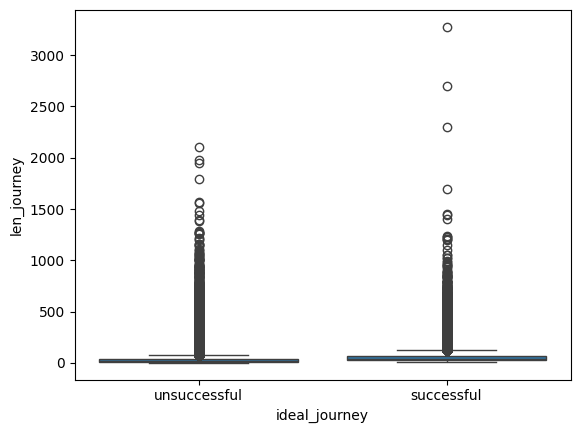

In [111]:
sns.boxplot(data=wide_df, x='ideal_journey', y='len_journey')
plt.show()

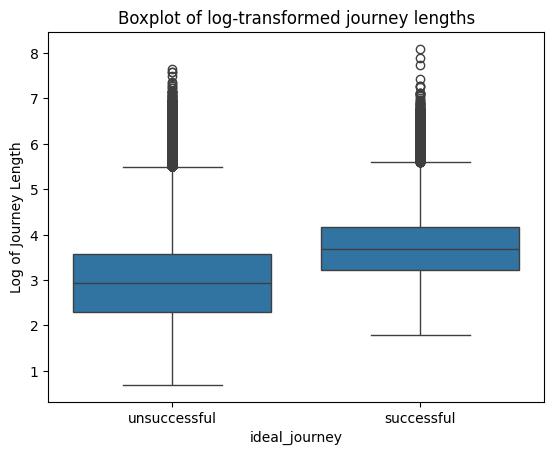

In [112]:
wide_df['log_len_journey'] = np.log(wide_df['len_journey'] + 1)

# Now, let's replot the boxplot with the log-transformed data
sns.boxplot(data=wide_df, x='ideal_journey', y='log_len_journey')
plt.title('Boxplot of log-transformed journey lengths')
plt.ylabel('Log of Journey Length')
plt.show()